In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression

# packages for spatial analysis
import geopandas as gpd
import contextily as ctx

## Australian climate data analysis

In [105]:
data = pd.read_csv("indiv1_perth_airport.csv")

In [8]:
data.head()

,STATION,NAME,DATE,PRCP,TAVG
0,ASN00009021,"PERTH AIRPORT, AS",1944-05,110.6,NaN
1,ASN00009021,"PERTH AIRPORT, AS",1944-06,77.5,14.3
2,ASN00009021,"PERTH AIRPORT, AS",1944-07,177.4,13.0
3,ASN00009021,"PERTH AIRPORT, AS",1944-08,108.3,13.3
4,ASN00009021,"PERTH AIRPORT, AS",1944-09,53.1,14.1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  908 non-null    object        
 1   NAME     908 non-null    object        
 2   DATE     908 non-null    datetime64[ns]
 3   PRCP     908 non-null    float64       
 4   TAVG     907 non-null    float64       
 5   YEAR     908 non-null    int64         
 6   MONTH    908 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 49.8+ KB


### (a) Plot a figure of the monthly climatology of precipitation. That is, the average for each month of the year taken across the years 1981-2010. What is the rainiest month?

In [14]:
# create YEAR and MONTH columns
data['DATE'] = pd.to_datetime(data['DATE'])
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month

# calculate the average
avg_prcp = data[(data['YEAR'] >= 1981) & (data['YEAR'] <= 2010)].groupby('MONTH')['PRCP'].mean()

Text(0, 0.5, 'Average Precipitation (mm)')

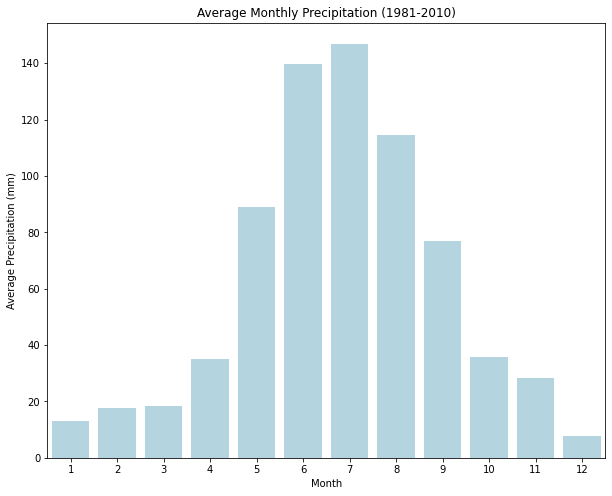

In [26]:
# plot the bar chart from 1981 to 2010
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_prcp.index, y=avg_prcp.values, color='lightblue')
plt.title('Average Monthly Precipitation (1981-2010)')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')

From the picture above, we can see **July** is the rainiest month with 146.94 average precipitation.

### (b) Plot the July rainfall for each year (since 1944) in the dataset and fit a linear trend line. Interpret the trend. Perform a statistical test that the later period (1981-2010) is statistically different than the earlier period (1951-1980). What is the result?

In [71]:
# filter July data
data_7 = data[data['MONTH'] == 7]

In [72]:
# do linear regression
X_7 = data_7['YEAR'].values.reshape(-1, 1)
y_7 = data_7['PRCP'].values

# fit the model
model_7 = LinearRegression().fit(X_7, y_7)
trend_line_7 = model_7.predict(X_july)

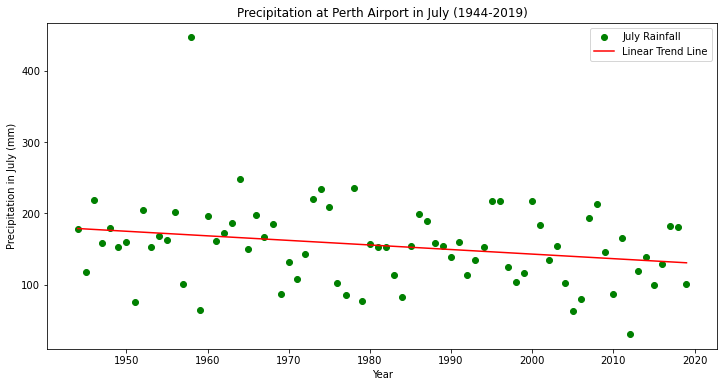

In [73]:
# visualization
plt.figure(figsize=(12, 6))
plt.scatter(data_7['YEAR'], y_7, color='green', label='July Rainfall')
plt.plot(data_7['YEAR'], trend_line_7, color='red', label='Linear Trend Line')
plt.title('Precipitation at Perth Airport in July (1944-2019)')
plt.xlabel('Year')
plt.ylabel('Precipitation in July (mm)')
plt.legend()

In [74]:
# coefficients and intercepts
slope, intercept = model_7.coef_[0], model_7.intercept_
(slope, intercept)

(-0.6410252904989745, 1424.733718386876)

For the linear regression with a negative slope, we can see the precipitation level is gradually decreasing from 1944 to 2019. The negative slope of the linear regression tells us that for every year onwards, the precipitation is approximately decreasing by 0.64 mm on average. The small p-value (0.034) is small than the significance level (we set 0.05 at this time), suggesting this relationship is statistically significant.

In [75]:
# whether statistical significance
data_1951_1980 = data_7[(data_7['YEAR'] >= 1951) & (data_7['YEAR'] <= 1980)]
data_1981_2010 = data_7[(data_7['YEAR'] >= 1981) & (data_7['YEAR'] <= 2010)]
t_stat, p_val = stats.ttest_ind(data_1951_1980['PRCP'], data_1981_2010['PRCP'], equal_var=False)


(slope, intercept), (t_stat, p_val)

((-0.6410252904989745, 1424.733718386876),
 (1.3192448274523987, 0.19347436409564295))

The t-test has a t-statistic of 1.319 and a p-value of approximately 0.193. Since the p-value is greater than the significance level (we set 0.05 at this time), we **cannot say that we have the confidence to reject the null hypothesis**, suggesting that there is **no statistically significant difference** in July rainfall between these two periods.

### (c) Rainfall may occur over all winter months. Take the average across May-August and plot the trend in average winter rainfall (since 1944). Interpret the trend. Run your test again. What is the result?

In [76]:
# filter data from May to August
data_winter = data[data['MONTH'].isin([5, 6, 7, 8])]
average_data_winter = data_winter.groupby('YEAR')['PRCP'].mean().reset_index()

In [77]:
# preparing data for linear regression
X_winter = average_data_winter['YEAR'].values.reshape(-1, 1)
y_winter = average_data_winter['PRCP'].values

# apply linear regression
model_winter = LinearRegression()
model_winter.fit(X_winter, y_winter)

# predictions
y_winter_pred = model_winter.predict(X_winter)

# coefficients, intercept
slope_ = model_winter.coef_[0]
intercept = model_winter.intercept_

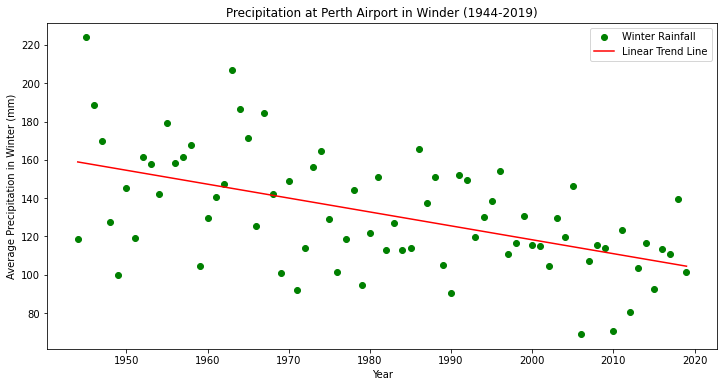

In [78]:
# visualization
plt.figure(figsize=(12, 6))
plt.scatter(X_winter, y_winter, color='green', label='Winter Rainfall')
plt.plot(X_winter, y_winter_pred, color='red', label='Linear Trend Line')
plt.title('Precipitation at Perth Airport in Winder (1944-2019)')
plt.xlabel('Year')
plt.ylabel('Average Precipitation in Winter (mm)')
plt.legend()

plt.show()

In [79]:
print("slope: " + str(slope_))
print("intercept: " + str(intercept))

slope: -0.7259883800410115
intercept: 1570.2176855775801


For the linear regression with a negative slope, we can see the precipitation level in Winter is gradually decreasing from 1944 to 2019. The negative slope of the linear regression tells us that for every year onwards, the precipitation in Winter is approximately decreasing by 0.73 mm on average.

In [69]:
# whether statistical significance
winter_data_1951_1980 = data_winter[(data_winter['YEAR'] >= 1951) & (data_winter['YEAR'] <= 1980)]
winter_data_1981_2010 = data_winter[(data_winter['YEAR'] >= 1981) & (data_winter['YEAR'] <= 2010)]

average_winter_rainfall_1951_1980 = winter_data_1951_1980.groupby('YEAR')['PRCP'].mean()
average_winter_rainfall_1981_2010 = winter_data_1981_2010.groupby('YEAR')['PRCP'].mean()

t_stat_winter, p_val_diff_winter = stats.ttest_ind(average_winter_rainfall_1951_1980, average_winter_rainfall_1981_2010, equal_var=False)

(t_stat_winter, p_val_diff_winter)


(2.9058532849928476, 0.005272838045999156)

The t-test has a t-statistic of 2.906 and a p-value of approximately 0.005. Since the p-value is less than the significance level (we set 0.05 at this time), we have the confidence to reject the null hypothesis, suggesting that **there is statistically significant difference** in average winter rainfall between these two periods.

## Climate change and inequality

In [149]:
income_df = pd.read_csv('indiv1_us_counties_incomes.csv')
temperature_df = pd.read_csv('indiv1_us_counties_temperature.csv')

In [150]:
income_df.head()

,fips,income_per_capita_2018
0,1001,41618
1,1003,45596
2,1005,35199
3,1007,30254
4,1009,34976


In [151]:
temperature_df.head()

,fips,county,state,lat,lon,normal_1981_2010,rcp85_2020_2039,rcp85_2040_2059,rcp85_2080_2099
0,1001,Autauga County,AL,32.535000,-86.642998,18.361113,19.527779,20.516666,22.622223
1,1003,Baldwin County,AL,30.736000,-87.723000,19.211113,20.288887,21.133333,23.144447
2,1005,Barbour County,AL,31.870001,-85.392998,17.283333,18.438890,19.394447,21.477779
3,1007,Bibb County,AL,32.999001,-87.125999,16.433334,17.633335,18.666666,20.805553
4,1009,Blount County,AL,33.980999,-86.567001,15.961111,17.166668,18.255556,20.455555


### (a) Plot a histogram of county temperatures for 1981-2010. On the same figure plot a histogram of county temperatures under RCP8.5 emissions from 2080-2099. The answer may be obvious, but describe the plot.

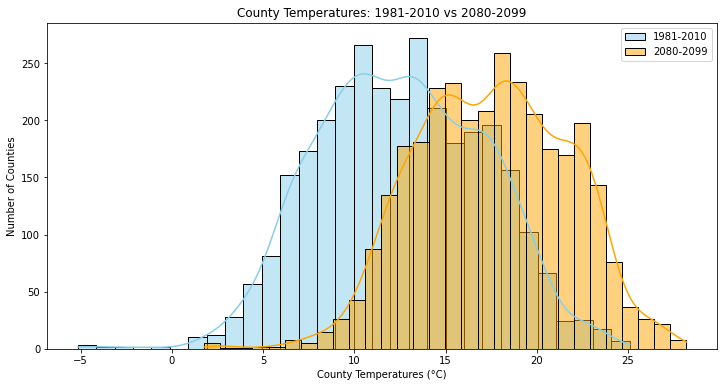

In [152]:
plt.figure(figsize=(12, 6))
sns.histplot(temperature_df['normal_1981_2010'], color="skyblue", label="1981-2010", kde=True, bins=30)
sns.histplot(temperature_df['rcp85_2080_2099'], color="orange", label="2080-2099", kde=True, bins=30)

plt.title('County Temperatures: 1981-2010 vs 2080-2099')
plt.xlabel('County Temperatures (°C)')
plt.ylabel('Number of Counties')
plt.legend()
plt.show()

Two plots clearly show that there is a shift towards higher temperatures in the future period (2080-2099) compared to the historical period (1981-2010), suggesting in the future the average temperature will be warmer.

### (b) Calculate the income deciles for the counties. Calculate the average temperatures for each time period for these income deciles.

In [153]:
# calculate income deciles
income_df['income_decile'] = pd.qcut(income_df['income_per_capita_2018'], 10, labels=False)

# merging the temperature data with the income data on the 'fips' column
merged_data = pd.merge(temperature_df, income_df, on='fips')

# calculate average temperatures for each time period
# from decile 0 to decile 9, it's the income from low to high
data_1981_2010 = merged_data.groupby('income_decile')['normal_1981_2010'].mean()
data_2020_2039 = merged_data.groupby('income_decile')['rcp85_2020_2039'].mean()
data_2040_2059 = merged_data.groupby('income_decile')['rcp85_2040_2059'].mean()
data_2080_2099 = merged_data.groupby('income_decile')['rcp85_2080_2099'].mean()

In [154]:
data_avg_temp_decile = pd.concat([data_1981_2010, data_2020_2039, data_2040_2059, data_2080_2099], axis=1).reset_index()
data_avg_temp_decile["income_decile"] = data_avg_temp_decile["income_decile"].apply(lambda x: x+1) # change the name of decile
data_avg_temp_decile


,income_decile,normal_1981_2010,rcp85_2020_2039,rcp85_2040_2059,rcp85_2080_2099
0,1,15.358387,16.633868,17.691613,20.045851
1,2,14.776277,16.072329,17.146552,19.539103
2,3,14.035352,15.345230,16.438157,18.872312
3,4,13.123866,14.474455,15.595498,18.082923
4,5,12.707270,14.066774,15.180011,17.686174
5,6,11.979100,13.351000,14.496838,17.057449
6,7,11.394605,12.767488,13.907949,16.481029
7,8,10.901554,12.292372,13.458074,16.086495
8,9,10.237478,11.643873,12.826313,15.489746
9,10,10.980983,12.333084,13.454950,15.986360


### (c) Plot these average temperatures against the income decile group for 1981-2010 and for 2080- 2099.

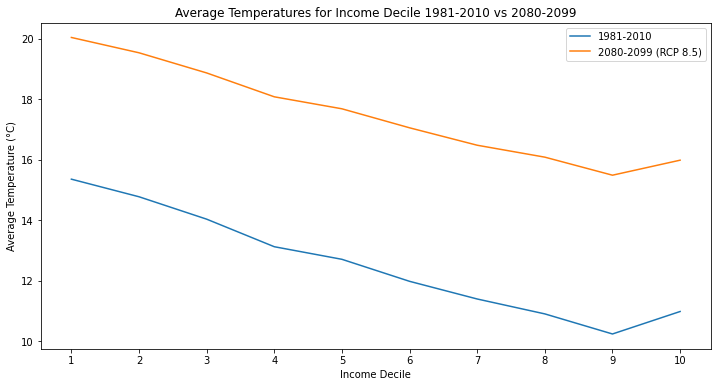

In [155]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=data_avg_temp_decile["income_decile"], y=data_1981_2010, label='1981-2010')
sns.lineplot(x=data_avg_temp_decile["income_decile"], y=data_2080_2099, label='2080-2099 (RCP 8.5)')

plt.title('Average Temperatures for Income Decile 1981-2010 vs 2080-2099')
plt.xlabel('Income Decile')
plt.ylabel('Average Temperature (°C)')
plt.xticks(data_avg_temp_decile["income_decile"])
plt.legend()
plt.show()

### (d) Interpret the plots. What does this imply about who will feel the impacts of climate change?

From the plot, we can see the projected future temperature period (2080-2099) will increase compared to 1981-2021 temperature period. Counties with lower income will suffer higher temperatue compared to wealthier counties.

### (e) Now create a variable that is the change in county temperature between the 1981-2010 period and the 2080-2099 period. Which income decile will experience the most change? Look at latitudes. What is the spatial pattern of those changes?

In [156]:
# creating temp_change column to calculate temperature difference
merged_data['temp_change'] = merged_data['rcp85_2080_2099'] - merged_data['normal_1981_2010']

# calculating average for each decile
avg_temp_change_decile = merged_data.groupby('income_decile')['temp_change'].mean().reset_index()

# merge the average with [merged_data]
avg_merged_data = merged_data.merge(avg_temp_change_decile, how='left', on='income_decile')
avg_merged_data = avg_merged_data.rename(columns={"temp_change_y": "avg_temp_change", "temp_change_x": "temp_change"})


In [160]:
# relationship between temperature change, income decile, and latitude
merged_data_temp_income_lat = merged_data.groupby('income_decile').agg({'temp_change': 'mean', 'lat': 'mean'}).reset_index()
merged_data_temp_income_lat["income_decile"] = merged_data_temp_income_lat["income_decile"].apply(lambda x: x+1)
merged_data_temp_income_lat

,income_decile,temp_change,lat
0,1,4.687464,35.063148
1,2,4.762826,35.701650
2,3,4.836960,36.530196
3,4,4.959057,37.522254
4,5,4.978903,38.189704
5,6,5.078350,39.196604
6,7,5.086424,39.847424
7,8,5.184941,40.421830
8,9,5.252269,41.422765
9,10,5.005377,40.813958


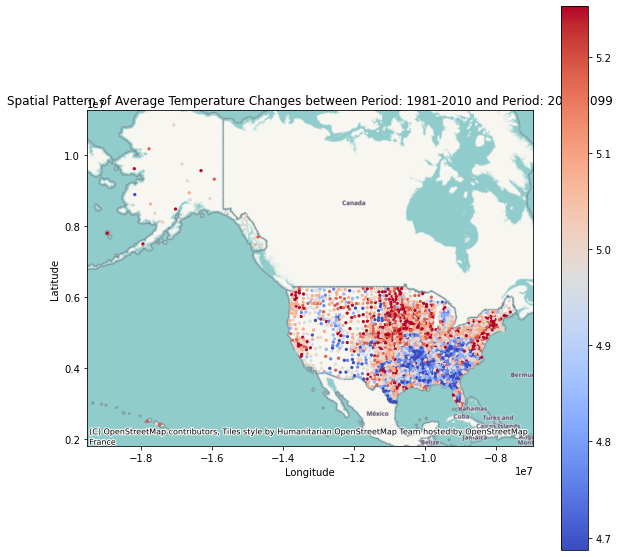

In [157]:
# convert the DataFrame into a GeoDataFrame
df = avg_merged_data
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Set the coordinate reference system (CRS) to WGS84
gdf.crs = 'EPSG:4326'

# Convert to Web Mercator for contextily basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='avg_temp_change', ax=ax, legend=True, cmap='coolwarm', marker='o', markersize=5)

# Add basemap
ctx.add_basemap(ax)

plt.title('Spatial Pattern of Average Temperature Changes between Period: 1981-2010 and Period: 2080-2099')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The ninth income decile (second highest) saw the greatest temperature increase. 

For the heatmap, we can see the spatial pattern between latitude and temperature change which indicates that counties with higher latitudes, which are generally at higher income deciles, are projected to experience greater temperature increases. 

### (f) If you were a policy-maker and saw all of these patterns, what would your main considerations be for making an equitable climate adaptation policy in the US? Be brief (∼ 2-3 sentences).

Since low income counties are projected to suffer higher temperature, so the government should give more fiancial and social support to those counties.

For wealthier counties in higher latitudes which are projected to have greater relative change, the government should make preparations in advance in areas like urban planning and carbon emission.

### (g) Bonus credit: download and merge in your favourite county-level social indicator that captures something about unequal distributions of wealth, power, and access in the US. The merge doesn’t need to be perfect (BEA aggregates some small counties, so quite a few will not merge with the dataset). Explore the relationship between temperature projections and this indicator.

## Climate change communication